In [1]:
import cv2

In [2]:
# Read the desired image using the OpenCV library.

# The enum (equivalent to 0) reads in the photo in grayscale
# Note that img_gray is just a matrix
img_gray = cv2.imread('../images/pinwheel.jpg', cv2.IMREAD_GRAYSCALE)

# NOTE Grayscaling this seems to change the shape (the size of the vector...)
# print(img_gray.shape)

In [3]:
# Obtain the negative by inverting the grayscale value
# Grayscale values are int between 0 and 255, therefore the inverse is 255-x:
img_gray_inv = 255 - img_gray

In [4]:
# Apply a Gaussian blur to reduce detail in image
img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21), sigmaX=5, sigmaY=5)

In [5]:
# Blend the grayscale image with the blurred image

# First define the function
# See: http://www.askaswiss.com/2016/01/how-to-create-pencil-sketch-opencv-python.html
def dodge(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

def burn(image, mask):
    return 255 - dodge(image, mask)


img_blend = dodge(img_gray, img_blur)

In [6]:
# Put the transformed image (img_blend) onto a canvas image
img_canvas = cv2.imread("../images/canvas.jpg", cv2.IMREAD_GRAYSCALE)

# Resize src so that is has the same size as img
# The second argument of resize takes a tuple, resize the canvas so that it is
# the same shape as the transformed image
img_canvas = cv2.resize(img_canvas, img_blend.shape)

print(type(img_blend))
print(type(img_canvas))

print(img_blend.size)
print(img_canvas.size)

print(img_blend.shape)
print(img_canvas.shape)

img_canvas2 = img_canvas.transpose()

print(img_canvas2.shape)

img_sketch = cv2.multiply(img_blend, img_canvas.transpose(), scale=1/256)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
250000
250000
(500, 500)
(500, 500)
(500, 500)


# Show the image
# First create a window called 'image' with freedom of dimensions
# NOTE: This is necessary because if your image is bigger than the screen, you're going
# to have problems.
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', 600,600)  # Resize the window to something sensible
cv2.imshow('image', img_blend)
# cv2.waitKey() is a keyboard binding function. Its argument is the time in milliseconds to wait
# for any keystroke. 0 means to wait indefinitely.
cv2.waitKey(0)
cv2.destroyAllWindows()

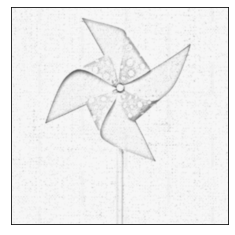

In [7]:
# Show the window with matplot lib
from matplotlib import pyplot as plt
plt.imshow(img_sketch, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
